# 1 Import and Init

In [192]:
import numpy as np

In [25]:
python_interpretator="/home/onyxia/work/Sampling-Methods-MCMC-Project/Manifold_MALA/mMALA_Vistual_Env/bin/python"

2. Set mMALA Requirement Function

In [197]:
def log_likelihood(X,Y,beta_):
    N,k=X.shape
    beta_T=beta_.transpose()
    X_T=X.transpose()

    log_likeli=np.round((beta_T@X_T)@Y,5)

    for n in range(N):
        log_likeli=log_likeli-np.log(1+np.round(np.exp(beta_T@(X[n,:])).transpose(),5))

    return np.round(log_likeli,5)


In [198]:
# application
X=np.random.randn(500,2)
Y=np.random.randn(500)#.reshape(3,1)
beta_=np.ones(2)#.reshape(3,1)

print(X.shape,Y.shape,beta_.shape)


(500, 2) (500,) (2,)


In [196]:
ll=log_likelihood(X,Y,beta_)
np.exp(-ll)

3.3389503602019503e+199

In [199]:
k=2
mu=np.zeros(k)
variance_=np.identity(k)
sigma_square=1  # " dans la papier sigma_square=100"
def get_densite_value(betha_,mu=mu,variance_=sigma_square*np.identity(k)):
    k=len(beta_)
    det_=np.linalg.det(variance_)
    inv_variance_=np.linalg.inv(variance_)
    gap=betha_-mu
    gap_T=gap.transpose()
    pi_=np.round(np.pi,3)
    const1=np.sqrt(((2*pi_)**(k)))
    normalisation_constante=np.round((1/(const1*det_)),3)
    value=(-1/2)*(gap@inv_variance_@gap_T)
    densite_value=normalisation_constante*np.exp(value)

    return np.round(densite_value,5)

In [201]:
get_densite_value(beta_)

0.05849

In [202]:
beta2=np.zeros(2)
get_densite_value(beta2)*2*np.pi  

0.9990264638415542

In [229]:
def link_fun_value(X_i,betha_):
    betha_T=betha_.transpose()
    X_i_T=X_i.transpose()
    x=betha_T@X_i_T
    value1=np.round(np.exp(-x),5)
    value=1/(1+value1)
    return np.round(value,3)

In [231]:
X_1=X[2]
link_fun_value(X[1],beta_),link_fun_value(X[2],beta_)

(0.586, 0.037)

In [232]:
def get_Lambda_Matrix(X,betha_):
    N=X.shape[0]
    left_real_values=[link_fun_value(X[i,:],betha_) for i in range(N)]
    real_values=[left_real_values[i]*(1-left_real_values[i]) for i in range(N)]
    Lambda_matrix=np.diag(real_values)

    return Lambda_matrix


In [233]:
Lambda_Matrix=get_Lambda_Matrix(X,beta_)
Lambda_Matrix

array([[0.110871, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.242604, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.035631, ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.175471, 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.161196, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.080256]])

In [236]:
def Tensor_metric_G(X,beta_,sigma_square=1):
    k=len(beta_)
    Lambda_Matrix=get_Lambda_Matrix(X,beta_)
    X_t=X.transpose()
    G_of_beta=X_t@(Lambda_Matrix@X)-sigma_square*np.identity(k)

    return G_of_beta

In [237]:
G_of_beta=Tensor_metric_G(X,beta_)
G_of_beta

array([[ 61.36991775, -14.44163116],
       [-14.44163116,  62.92446147]])

In [238]:
def compute_V_i(X,i,beta_):
    N=X.shape[0]
    diag_elts=[(1-2*link_fun_value(X[n],beta_))*X[n,i] for n in range(N)]
    V_i_Matrix=np.diag(diag_elts)
    return V_i_Matrix

In [239]:
i=0
compute_V_i(X,i,beta_)

array([[-0.00244335,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.03436258,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -2.38744923, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.47491697,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.20829766,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.31900335]])

In [240]:
def get_G_partial_derivative(X,i,beta_):
    X_t=X.transpose()
    Lambda_Matrix=get_Lambda_Matrix(X,beta_)
    V_i_Matrix=compute_V_i(X,i,beta_)
    G_partial_derivative_Matrix=X_t@Lambda_Matrix@V_i_Matrix@X

    return G_partial_derivative_Matrix


In [241]:
G_partial_derivative_Matrix=get_G_partial_derivative(X,i,beta_)
G_partial_derivative_Matrix

array([[-40.39677727,  -6.13410437],
       [ -6.13410437,  -7.74691488]])

In [149]:
x=np.zeros((2,3))
x.transpose()

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [242]:
def Log_likelihood_gradient(X,Y,beta_):
    N=X.shape[0]
    X_Transpose=X.transpose()
    X_n=np.zeros(k)
    gradien_value=X_Transpose@Y
    for n in range(N):
        X_n=X[n,:]
        gradien_value=gradien_value-link_fun_value(X_n,beta_)*(X_n.transpose())

    return gradien_value


In [243]:
gradien_value=Log_likelihood_gradient(X,Y,beta_)
gradien_value

array([ -65.45359288, -146.8046665 ])

In [247]:
def proposal_Distribution_mean(X,Y,beta_,learning_rate):
    N,k=X.shape
    e=learning_rate
    G=Tensor_metric_G(X,beta_)
    inv_G=np.linalg.inv(G)

    term2=(1/2)*(e**2)*inv_G@Log_likelihood_gradient(X,Y,beta_)
    term3=np.zeros(k)
    term4=np.zeros(k)
    for j in range(k):
        term3=term3-(e**2)*(inv_G@get_G_partial_derivative(X,j,beta_)@inv_G)[:,j]
    for j in range(k):
        terme4=term4+(e**2)*inv_G[:,j]*np.trace(inv_G@get_G_partial_derivative(X,j,beta_))

    proposal_mean=beta_+term2+term3+term4
    return proposal_mean
    

In [248]:
proposal_mean=proposal_Distribution_mean(X,Y,beta_,learning_rate=1)
proposal_mean

array([ 0.16461271, -0.34439983])

In [249]:
def get_matrix_sqrt(X):
    U, s, V = np.linalg.svd(X)

# Racine carrée des valeurs singulières
    s_sqrt = np.sqrt(s)

# Reconstruction de la matrice racine carrée
    X_sqrt = U.dot(np.diag(s_sqrt)).dot(V)

    return X_sqrt

In [251]:
def proposal_Distribution_variance_matrix_fun(X,beta_,sigma_square,learning_rate):
    e=learning_rate
    G=Tensor_metric_G(X,beta_)
    inv_G=np.linalg.inv(G)
    inv_G_sqrt=get_matrix_sqrt(inv_G)
    
    return e*inv_G_sqrt

In [252]:
def beta_drawner(X,Y,beta_,learning_rate=1):
    e=learning_rate
    N,k=X.shape
    mean_=proposal_Distribution_mean(X,Y,beta_,learning_rate=e)
    variance=e*proposal_Distribution_variance_matrix_fun(X,beta_,sigma_square,learning_rate)
    Z=np.random.randn(k)
    proposed_teta=+variance@Z
    
    return proposed_teta

In [253]:
thetaStart=beta_drawner(X,Y,beta_,learning_rate=1)
thetaStart

array([0.07491145, 0.03382943])

In [254]:
k=2
sigma_square=1
def Acceptance_Rati(thetaStart, theta_,X,Y,mu_prior=np.zeros(k),variance_=sigma_square*np.identity(k),learning_rate=1):
    LL_theta=log_likelihood(X,Y,theta_)
    LL_theta_start=log_likelihood(X,Y,thetaStart)

    teta_mu_proposal=proposal_Distribution_mean(X,Y,thetaStart,learning_rate)
    teta_variance_propsal=proposal_Distribution_variance_matrix_fun(X,thetaStart,sigma_square,learning_rate)
    tetaStart_mu_proposal=proposal_Distribution_mean(X,Y,beta_,learning_rate)
    tetaStar_variance_propsal=proposal_Distribution_variance_matrix_fun(X,beta_,sigma_square,learning_rate)

    
    p_teta=get_densite_value(theta_,mu=mu_prior,variance_=variance_)
    q_teta=get_densite_value(theta_,mu=teta_mu_proposal,variance_=teta_variance_propsal)

    p_teta_start=get_densite_value(theta_,mu=mu_prior,variance_=variance_)
    q_teta_start=get_densite_value(theta_,mu=tetaStart_mu_proposal,variance_=tetaStar_variance_propsal)

    acceptance_rate=np.round(LL_theta_start+np.log(p_teta_start)+np.log(q_teta_start)-LL_theta-np.log(p_teta)-np.log(q_teta),5)

    return acceptance_rate





In [255]:

acceptance_rate_=Acceptance_Rati(thetaStart, beta_,X,Y,mu_prior=np.zeros(k),variance_=sigma_square*np.identity(k),learning_rate=1)
acceptance_rate_

139.79779

In [256]:
proposed_beta=beta_drawner(X,Y,beta_,learning_rate=1)
proposed_beta


array([-0.09951605, -0.11992885])

In [ ]:
"" puique les deux lois proposal and prior sont des loi de normales alors , on a beasoin d'implémenter une fonction
calcul le log prior pour la loi propsal , on juste utiliser celle basée sur la loi à priori en définisant la moyenne et la 
variance des dlois comme des arguments ."

In [257]:
def one_step_mMALA(X,Y,beta_,learning):
    # sample new teta base on the previous teta
    N,k=X.shape
    thetaStart=beta_drawner(X,Y,beta_,learning_rate=1)
    acceptance_rate_=Acceptance_Rati(thetaStart, beta_,X,Y,mu_prior=np.zeros(k),variance_=sigma_square*np.identity(k),learning_rate=1)
    rand=np.random.uniform(0, 1)
    if (acceptance_rate_>0) or (acceptance_rate_>np.log(rand)):
        return thetaStart
    else:
        return beta_

# 0 DGP 

In [260]:
seed=1996
np.random.seed(seed)
rd.seed(seed)

In [261]:
import  numpy as np 
import random as rd 

In [262]:
N=500
k=2
def get_covariate_data(N=N,k=k):
    data=np.random.randn(N,k)

    return data

In [263]:
def indicator_fun(x):
    if x >= 0:
        return 1
    else:
         return 0

In [264]:
X=get_covariate_data(N,k)

In [265]:
X.shape

(500, 2)

In [266]:

N,k=X.shape
teta=np.array([i/k for i in range(k)])
def get_output(data,teta):
    noise_value=np.random.randn(N).reshape(N,1)
    teta=teta.reshape(k,1)
    data=data.reshape(N,k)
    value_=data@teta   #+noise_value
    Y=np.array([indicator_fun(value_[i]) for i in range(N)])
    return Y 

In [267]:
Y=get_output(X,teta)
Y.shape

(500,)

In [268]:
X[0:5],Y[0:5]

(array([[-0.57285766,  0.15460676],
        [ 1.88962132, -0.61375061],
        [-0.19281915, -0.48191554],
        [ 1.33225346,  0.17746124],
        [-0.36277234,  0.33420864]]),
 array([1, 0, 0, 1, 1]))

# I Manifold MALA Alogrithsm

In [269]:
def get_mMALA_MarkovCHaine(X,Y,B=1000):
    N,k=X.shape
    theta_current=np.zeros(k)
    mc_teta=[]
    for b in range(B):
        theta_current=one_step_mMALA(X,Y,theta_current,learning=0.1)
        mc_teta.append(theta_current)    
    return   mc_teta

In [274]:
Markov_Chaine=get_mMALA_MarkovCHaine(X,Y,B=100)


In [279]:
def predictor(X,teta_hat):
    N=X.shape[0]
    Pred_Probas=np.zeros(N)
    Y_pred=np.zeros(N)
    for i in range(N):
        Pred_Probas[i]=link_fun_value(X[i],teta_hat)
        Y_pred[i]=indicator_fun(Pred_Probas[i]-0.5)

    return Y_pred

In [283]:
# Exemple de données de prédiction et de vraies étiquettes
beta_hat=Markov_Chaine[-1]
y_true = Y[0:20]
y_pred = predictor(X[0:20],teta)


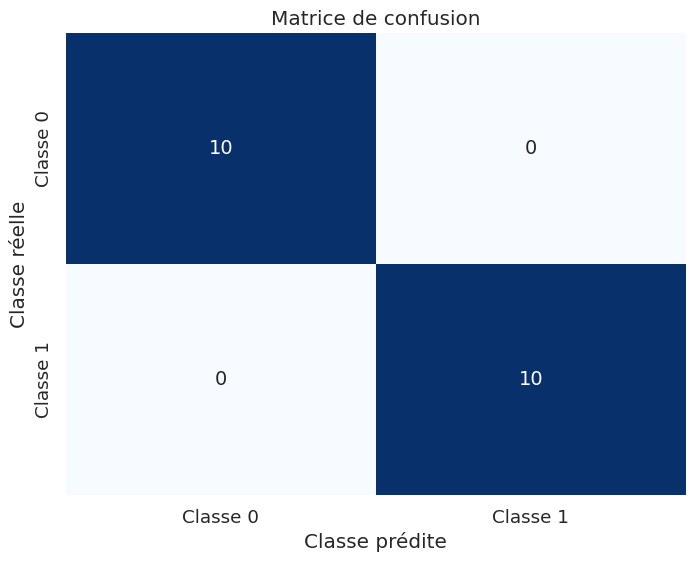

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()
